In [1]:
from fl_spn.partitioner import FederatedDataPartitioner
from trainer import FederatedEiNetTrainer
from utils import load_dataset
from fl_spn.config import SupervisedFLConfig

SupervisedFLConfig.epochs

20

## Start the Experiment

In [2]:
data = load_dataset(name="adult")

partitioner = FederatedDataPartitioner(
    X=data["X_train"],
    y=data["y_train"],
    feature_names=data["X_processed"].columns.tolist(),
    numeric_features=data["numeric_features"],
    categorical_features=data["categorical_features"],
)

In [3]:
print("\n" + "=" * 60)
print("🔵 Test 1: Horizontal Partitioning")
print("=" * 60)

horizontal_partition = partitioner.horizontal_partition(
    num_clients=SupervisedFLConfig.num_clients,
    random_state=SupervisedFLConfig.random_seed,
)

horizontal_trainer = FederatedEiNetTrainer(horizontal_partition)

horizontal_results = horizontal_trainer.train_federated_learning(
    data["X_processed"], epochs=SupervisedFLConfig.epochs, verbose=True
)
horizontal_eval = horizontal_trainer.evaluate_on_test(
        data["X_test"], data["y_test"], data["X_processed"].columns.tolist()
    )


🔵 Test 1: Horizontal Partitioning


Initializing PiecewiseLinear Leaf Layer: 100%|██████████| 3/3 [00:00<00:00,  9.35it/s]
/Users/M279402/PycharmProjects/fl_spn/.venv/lib/python3.10/site-packages/simple_einet/layers/distributions/piecewise_linear.py:263: UserWarning: torch.searchsorted(): input value tensor is non-contiguous, this will lower the performance due to extra data copy when converting non-contiguous tensor to contiguous, please use contiguous input value tensor if possible. This message will only appear once per program. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/BucketizationUtils.h:34.)
  indices = torch.searchsorted(xp, x, right=False)
Initializing PiecewiseLinear Leaf Layer: 100%|██████████| 3/3 [00:00<00:00, 11.49it/s]


In [5]:
horizontal_eval

{'client_evaluations': {'client_0': {'accuracy': 76.81591796875,
   'f1_score': 53.88787595870688,
   'n_test_features': 14,
   'predictions': tensor([0, 0, 0,  ..., 0, 0, 0])},
  'client_1': {'accuracy': 75.47816467285156,
   'f1_score': 58.182378251662506,
   'n_test_features': 14,
   'predictions': tensor([0, 0, 0,  ..., 0, 1, 0])},
  'client_2': {'accuracy': 73.23383331298828,
   'f1_score': 58.71391505003748,
   'n_test_features': 14,
   'predictions': tensor([0, 0, 0,  ..., 0, 0, 1])}},
 'ensemble_accuracy': 0.7699281370923162,
 'ensemble_f1': 0.6992261134269504,
 'ensemble_predictions': array([0, 0, 0, ..., 0, 0, 0]),
 'ensemble_method': 'probability averaging'}

In [4]:
print("\n" + "="*60)
print("🟢 Test 2: Vertical Partitioning")
print("="*60)

vertical_partition = partitioner.vertical_partition(
    num_clients=SupervisedFLConfig.num_clients, 
    random_state=SupervisedFLConfig.random_seed)

vertical_trainer = FederatedEiNetTrainer(vertical_partition)

vertical_results = vertical_trainer.train_federated_learning(
    data["X_processed"], epochs=SupervisedFLConfig.epochs, verbose=True
)

# 在測試集上評估
vertical_eval = vertical_trainer.evaluate_on_test(
    data["X_test"], data["y_test"], data["X_processed"].columns.tolist()
)


🟢 Test 2: Vertical Partitioning


Initializing PiecewiseLinear Leaf Layer: 100%|██████████| 3/3 [00:00<00:00,  7.66it/s]


In [6]:
print("\n" + "=" * 60)
print("🟡 Test 3: Hybrid Partitioning")
print("=" * 60)

hybrid_partition = partitioner.hybrid_partition(
    num_clients=SupervisedFLConfig.num_clients,
    sample_overlap_ratio=SupervisedFLConfig.sample_overlap_ratio,
    feature_overlap_ratio=SupervisedFLConfig.feature_overlap_ratio,
    random_state=SupervisedFLConfig.random_seed,
)
hybrid_trainer = FederatedEiNetTrainer(hybrid_partition)
hybrid_results = hybrid_trainer.train_federated_learning(
    data["X_processed"], epochs=SupervisedFLConfig.epochs, verbose=True
)
hybrid_eval = hybrid_trainer.evaluate_on_test(
        data["X_test"], data["y_test"], data["X_processed"].columns.tolist()
    )


🟡 Test 3: Hybrid Partitioning


Initializing PiecewiseLinear Leaf Layer: 100%|██████████| 3/3 [00:00<00:00, 250.19it/s]


In [7]:
methods = ['Horizontal', 'Vertical', 'Hybrid']

train_acc = [t.item() for t in [horizontal_results['weighted_accuracy'], 
             vertical_results['weighted_accuracy'], 
             hybrid_results['weighted_accuracy']]]

f1_acc = [horizontal_results['weighted_f1'], 
          vertical_results['weighted_f1'], 
          hybrid_results['weighted_f1']]

train_time = [horizontal_results['total_training_time'], 
              vertical_results['total_training_time'], 
              hybrid_results['total_training_time']]

clients = [horizontal_results['num_clients'], 
           vertical_results['num_clients'], 
           hybrid_results['num_clients']]

samples = [horizontal_results['total_samples'], 
           vertical_results['total_samples'], 
           hybrid_results['total_samples']]

test_acc = [hybrid_eval['ensemble_accuracy']*100,
            vertical_eval['ensemble_accuracy']*100,
            hybrid_eval['ensemble_accuracy']*100]

test_f1 = [hybrid_eval['ensemble_f1']*100,
            vertical_eval['ensemble_f1']*100,
            hybrid_eval['ensemble_f1']*100]

colors = ['#F3AA60', '#EF6262', '#468897']


AttributeError: 'float' object has no attribute 'item'

In [42]:
horizontal_results['client_results']

{'client_0': {'train_accuracy': tensor(79.2935),
  'train_f1': 62.85624962769991,
  'training_time': 21.034687280654907,
  'n_samples': 12059,
  'n_features': 14,
  'feature_overlap': ['age',
   'fnlwgt',
   'education-num',
   'capital-gain',
   'capital-loss',
   'hours-per-week',
   'workclass',
   'education',
   'marital-status',
   'occupation',
   'relationship',
   'race',
   'sex',
   'native-country'],
  'config': EinetConfig(num_features=14, num_channels=1, num_sums=12, num_leaves=12, num_repetitions=3, num_classes=2, depth=2, dropout=0.0, leaf_type=<class 'simple_einet.layers.distributions.piecewise_linear.PiecewiseLinear'>, leaf_kwargs={'alpha': 0.1}, layer_type='linsum', structure='top-down'),
  'domains_count': 14},
 'client_1': {'train_accuracy': tensor(81.4247),
  'train_f1': 72.15005804614411,
  'training_time': 20.932882070541382,
  'n_samples': 12059,
  'n_features': 14,
  'feature_overlap': ['age',
   'fnlwgt',
   'education-num',
   'capital-gain',
   'capital-los

In [39]:
hybrid_eval['client_evaluations']

{'client_0': {'accuracy': tensor(65.8154),
  'f1_score': 62.921233729944795,
  'n_test_features': 2,
  'predictions': tensor([1, 0, 0,  ..., 0, 0, 1])},
 'client_1': {'accuracy': tensor(66.4455),
  'f1_score': 60.9241512967064,
  'n_test_features': 2,
  'predictions': tensor([0, 0, 0,  ..., 0, 0, 1])},
 'client_2': {'accuracy': tensor(74.7153),
  'f1_score': 43.43930263867975,
  'n_test_features': 2,
  'predictions': tensor([0, 0, 0,  ..., 0, 0, 0])}}

## Plot the results

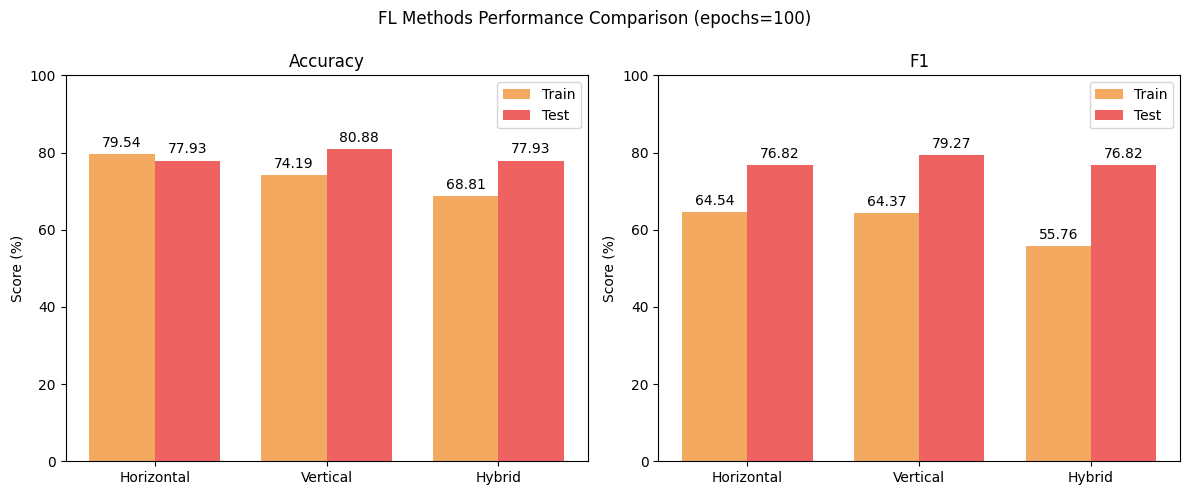

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 假設已有：methods, colors, train_acc, test_acc, f1_acc, test_f1, SupervisedFLConfig
# colors 與 methods 對應
palette = {m: c for m, c in zip(["Train", "Test"], [colors[0], colors[1]])}  # 可自定顏色

x = np.arange(len(methods)) 
width = 0.38 

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle(f'FL Methods Performance Comparison (epochs={SupervisedFLConfig.epochs})')

# -------- Accuracy（群組：方法；組內：Train/Test）--------
ax = axs[0]
rects_train_acc = ax.bar(x - width/2, train_acc, width, label='Train', color=palette["Train"])
rects_test_acc  = ax.bar(x + width/2, test_acc,  width, label='Test',  color=palette["Test"])
ax.set_title('Accuracy')
ax.set_ylim([0, 100])
ax.set_ylabel("Score (%)")
ax.set_xticks(x, methods)
ax.legend()

ax.bar_label(rects_train_acc, padding=3, fmt="%.2f")
ax.bar_label(rects_test_acc,  padding=3, fmt="%.2f")

# -------- F1（群組：方法；組內：Train/Test）--------
ax = axs[1]
rects_train_f1 = ax.bar(x - width/2, f1_acc,  width, label='Train', color=palette["Train"])
rects_test_f1  = ax.bar(x + width/2, test_f1, width, label='Test',  color=palette["Test"])
ax.set_title('F1')
ax.set_ylim([0, 100])
ax.set_ylabel("Score (%)")
ax.set_xticks(x, methods)
ax.legend()

ax.bar_label(rects_train_f1, padding=3, fmt="%.2f")
ax.bar_label(rects_test_f1,  padding=3, fmt="%.2f")

plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()


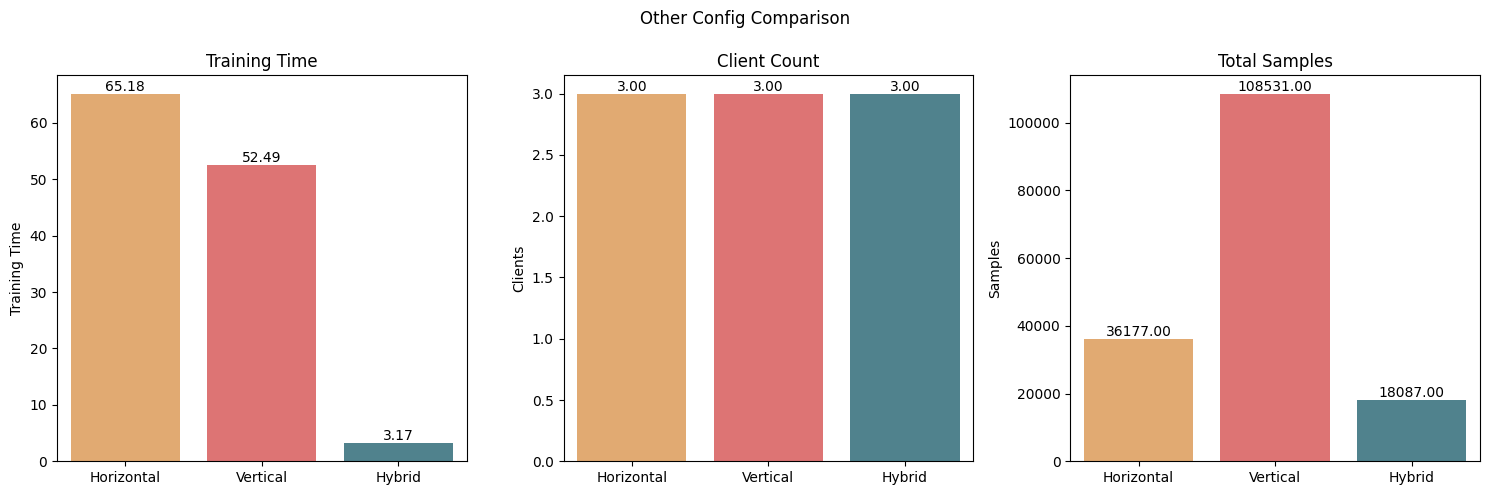

In [36]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Other Config Comparison')

titles = ['Training Time', 'Client Count', 'Total Samples']
ydata = [train_time, clients, samples]
ylabs = ['Training Time', 'Clients', 'Samples']

for idx in range(3):
    sns.barplot(
        x=methods, y=ydata[idx], ax=axs[idx], hue=methods,
        palette=colors_dict, errorbar=None, legend=False
    )
    axs[idx].set_title(titles[idx])
    axs[idx].set_xlabel("")  # 不額外標註
    axs[idx].set_ylabel(ylabs[idx])
    # 若要label在頂端
    for i, val in enumerate(ydata[idx]):
        axs[idx].text(i, val, f"{val:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()